In [ ]:
# import and initialize otter
import otter
grader = otter.Notebook("lab-p11.ipynb")

In [ ]:
import public_tests

# Lab-P11:  Scatter Plots and Recursion

In this lab, you will practice how to...
* create scatter plots,
* definine recursive functions.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P10 and P11 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P10, you have to sustain that partnership until end of P11. **You must acknowledge to the Lab TA to receive lab attendance credit.**
Be careful not to work with more than one partner. If you work with a partner on Lab-P11, you are **not** allowed to finish your project with a different partner.
You may either continue to work with the same partner, or work on P11 alone. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f23/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

## Setup:

Before proceeding much further, download `public_tests.py`, `expected_plots.json`, and `planets_small.json` and store them in the same directory as `lab-p11.ipynb`. You should also download `sample_data.zip` and  extract the contents of the directory `sample_data` into the same directory which contains the files `lab-p11.ipynb`, `public_tests.py`, `planets_small.json` and `expected_plots.json`.

You need to make sure that the project files are stored in the following structure:

```
+-- lab-p11.ipynb
+-- planets_small.json
+-- public_tests.py
+-- expected_plots.json
+-- sample_data
|   +-- .DS_Store
|   +-- file_1.json
|   +-- sample_1
|   |   +-- .ipynb_checkpoints
|   |   +-- file_2.json
|   |   +-- file_3.json
|   +-- sample_2
|   |   +-- file_4.json
|   |   +-- sample_3
|   |   |   +-- .DS_Store
|   |   |   +-- file_5.json
```

Make sure that **all** files are stored in this **exact** file structure.

## Introduction:

In P10, you parsed the data in the `data` directory and created some useful data structures. In P11, you will be creating scatter plots, and using recursion to gather even more data.

In Lab-P11, you will practice creating scatter plots on a smaller dataset, and also practice writing some recursive functions.

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [ ]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this lab

# we have imported these modules for you
import os
import json
from collections import namedtuple
import matplotlib.pyplot as plt

### Loading in data:

Before proceeding further, we will need to load in some data. Recall that in P10, we created a **list** of `Planet` objects called `planets_list`. In P11, you will be analyzing this **list** and using the data in there to create scatter plots. If you have not finished P10, do not worry about it. For Lab-P11, you will instead be working with a sample dataset. The data we will be analyzing in Lab-P11 is stored in `planets_small.json`.

**Warning:** Note that the data in `planets_small.json` is **not** stored in the same format as the files in the `data` directory that you parsed in P10. This file has been created solely for Lab-P11, so it is easier to load in the data without having to create the functions that you need to create in P10 to read the actual dataset.

In [ ]:
# we have defined the namedtuple 'Planet' for you

planets_attributes = ['planet_name',
                     'host_name', 
                     'discovery_method',
                     'discovery_year',
                     'controversial_flag',
                     'orbital_period',
                     'planet_radius',
                     'planet_mass',
                     'semi_major_radius',
                     'eccentricity',
                     'equilibrium_temperature',
                     'insolation_flux']

Planet = namedtuple("Planet", planets_attributes)

In [ ]:
# we have parsed the data in 'planets_small.json' and created a list of Planet objects for you

def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f)

# add the planets in 'planets_small.json' as Planet objects to 'small_planets_list'
small_planets_list = []
for planet in read_json('planets_small.json'):
    small_planets_list.append(Planet(**planet))

# display the first three Planet objects in 'small_planets_list'
small_planets_list[:3]

## Segment 1: Scatter Plots

We will first learn to create simple scatter plots.

### Function 1: `plot_scatter(x_data, y_data, x_label, y_label, c, s)`

You have been provided with a function `plot_scatter` which can create scatter plots. You do not need to worry about how it works just yet. The function will be explained to you over the course of the lab.

In [ ]:
def plot_scatter(x_data, y_data, x_label='x axis', y_label='y axis', c=None, s=7):
    plt.scatter(x_data, y_data, c=c, s=s)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Task 1.1: Simple plots with `scatter_plot`

**Question 1:** Create a **scatter plot** with the points *(1, 1)*, *(2, 2)*, *(3, 3)*, and *(4, 4)*.

You **must** first compute **two lists** which contain the *x*-coordinates and *y*-coordinates of the above points respectively. 

In [ ]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# we have done this one for you
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

In [ ]:
grader.check("q1")

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div>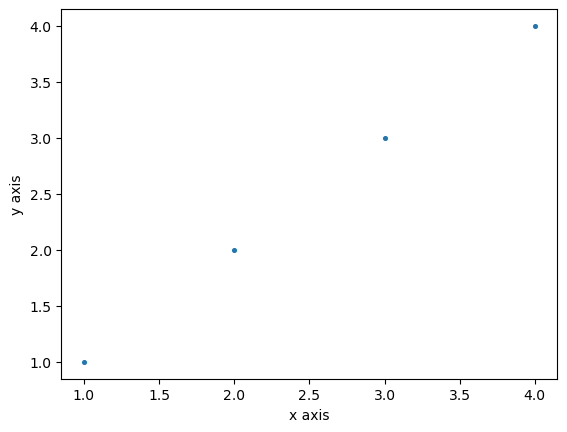</div>

In [ ]:
# plot 'x' and 'y'

plot_scatter(..., ...)

As you can see, in order to create the **scatter plot**, we had to create **two** lists `x` and `y`. The **list** `x` contains the data in the **x axis** and the **list** `y` contains the data in the **y axis**. For example, the element at index *0* of `x` is *1*, and the element at index *0* of `y` is *1*. Therefore, a point is added to the **scatter plot** at the position *(1, 1)*. Similarly, the other points are also added to the **scatter plot** using the `x` and `y` lists.

**Question 2:** Create a **scatter plot** with the points *(1, 4)*, *(2, 1)*, *(3, 2)*, and *(4, 3)*.

You **must** create **two lists** and store the **x** and **y** values in these lists. In order to pass `grader.check` for scatter plots, you **must** define **both** **lists** properly.

In [ ]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# replace the ... with your code

x = [1, 2, 3, 4]
y = ...

In [ ]:
grader.check("q2")

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div>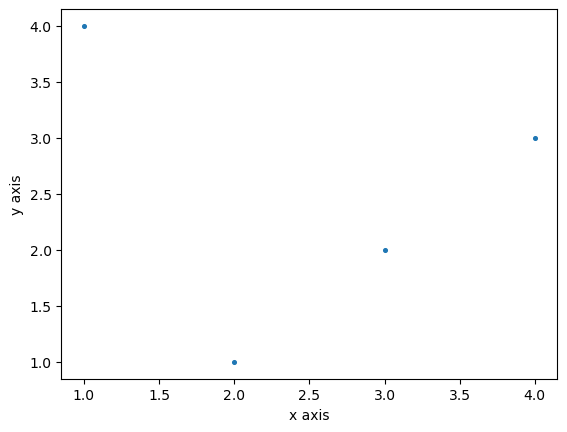</div>

In [ ]:
# plot 'x' and 'y'

plot_scatter(..., ...)

**Question 3:** Create a **scatter plot** having the numbers *(1, 2, 3, ... 10)* on the **x axis** and their **squares** on the **y axis**.

You **must** create **two lists** and store the **x** and **y** values in these lists. In order to pass `grader.check` for scatter plots, you **must** define **both** **lists** properly.

In [ ]:
# first compute and store the lists 'x' and 'y', but do NOT display them
# do NOT create the plot just yet

# replace the ... with your code

x = [i for i in range(1, 11)]
y = [... for j in x]

In [ ]:
grader.check("q3")

Now, **plot** `x` and `y` as **scatter plot**. Your plot should look like this:

<div>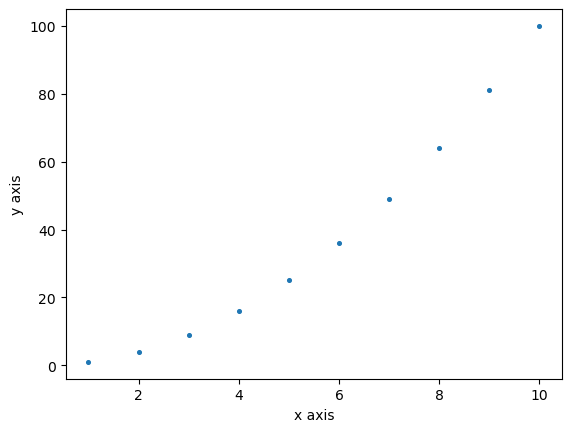</div>

In [ ]:
# plot 'x' and 'y'

plot_scatter(..., ...)

Note that the labels on the **x axis** and the **y axis** are not very descriptive. We can add in our own labels using the `plot_scatter` function by passing two optional arguments to the parameters `x_label` and `y_label` respectively.

**Question 4:** Create a **scatter plot** having the numbers *(1, 2, 3, .... 10)* on the **x axis** and their **squares** on the **y axis**. Moreover, add the label `"Numbers"` on the **x axis** and the `"Squares"` on the **y axis**.

In [ ]:
# since you have already computed the lists 'x' and 'y' you do not have to redefine them
# just run the next cell to confirm that the lists are still correct
# do NOT create the plot just yet

In [ ]:
grader.check("q4")

Now, **plot** `x` and `y` as **scatter plot** with the **x-axis** labelled *Numbers*, and the **y-axis** labelled *Squares*. Your plot should look like this:

<div>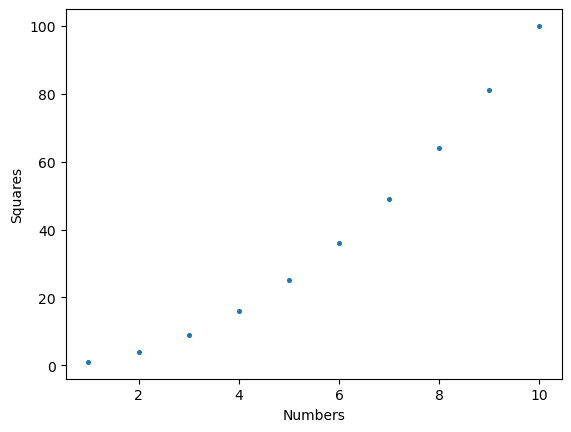</div>

In [ ]:
# we have already added in the label for the x axis
# complete the rest of the code and add the label for the y axis

plot_scatter(..., ..., x_label="Numbers", y_label=...)

### Task 1.2: Plotting planets with `scatter_plot`

We will now create more interesting plots using the data in the variable `small_planets_list`. However, let us first get acquainted with the dataset.

**Question 5:** What is the **number** of `Planet` objects in `small_planets_list` that were discovered in the time period *2000* to *2010* (both, inclusive)?

**Hint:** You can find the year of discovery of each `Planet` using the `discovery_year` attribute of the `Planet` objects.

In [ ]:
# compute and store the answer in the variable 'planet_count_2000_2010', then display it

# TODO: initialize the variable 'planet_count_2000_2010'
# TODO: loop through the planets in 'small_planets_list'
    # TODO: update 'planet_count_2000_2010' if the 'discovery_year'
    #       of the planet is between 2000 and 2010 
        
# TODO: display 'planet_count_2000_2010'

In [ ]:
grader.check("q5")

**Question 6:** What is the **percentage** of planets (in the range *0* to *100*) that have `insolation_flux` **greater** than *1000*?

You **must** ignore the `Planet` objects with **missing** `insolation_flux` data.

In [ ]:
# compute and store the answer in the variable 'flux_1000_percentage', then display it


In [ ]:
grader.check("q6")

**Question 7:** Create a **scatter plot** representing the `orbital_period` (on the **x-axis**) against the `semi_major_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period` or the `semi_major_radius` data is **missing**.

In [ ]:
# we have computed the lists 'orbital_period' and 'semi_major_radii' for you

orbital_periods = []
semi_major_radii = []
for planet in small_planets_list:
    orbital_period = planet.orbital_period
    semi_major_radius = planet.semi_major_radius
    if orbital_period == None or semi_major_radius == None:
        continue
    orbital_periods.append(orbital_period)
    semi_major_radii.append(semi_major_radius)

In [ ]:
grader.check("q7")

Now, we will **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*.

In [ ]:
# we have done this for you

plot_scatter(orbital_periods, semi_major_radii, 'Orbital Period','Semi Major Radius')

Note that almost all the points in the plot are clustered near the **y axis**. This is because there are a few outliers with **extremely high** `orbital_period`. To get a better idea of what the data looks like, it would be useful to create a **scatter plot** without the **outliers**.

**Question 8:** Create the same **scatter plot** as above, but **exclude** planets with `orbital_period` **more than** *1000*.

You **must** ignore any `Planet` objects for which **either** the `orbital_period` or the `semi_major_radius` data is **missing**. You **must** also ignore any `Planet` object with `orbital_period` **greater than** *1000*.

In [ ]:
# first compute and store the lists 'orbital_periods_no_outliers' and 'semi_major_radii_no_outliers', 
# but do NOT display them
# do NOT create the plot just yet

# replace the ... with your own code

orbital_periods_no_outliers = []
semi_major_radii_no_outliers = []
# TODO: loop through each planet in small_planets_list
    # TODO: skip the planets with missing 'orbital_period' or 'semi_major_radius' data
    # TODO: skip the planets with 'orbital_period' greater than 1000
    # TODO: add 'orbital_period' and 'semi_major_radius' data to the appropriate lists

In [ ]:
grader.check("q8")

Now, **plot** `orbital_periods_no_outliers` and `semi_major_radii_no_outliers` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*. Your plot should look like this:

<div>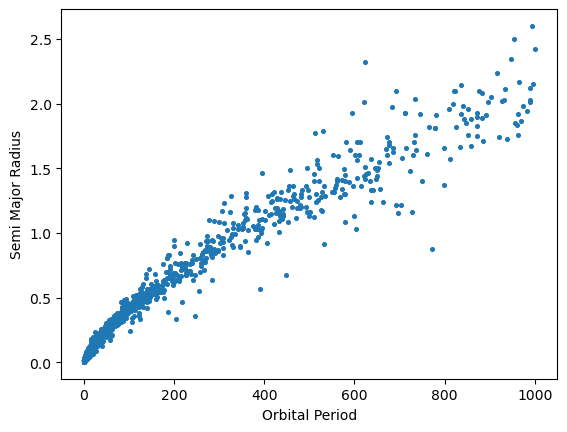</div>

In [ ]:
# plot 'orbital_periods_no_outliers' and 'semi_major_radii_no_outliers'

plot_scatter(..., ..., ..., ...)

**Question 9:** Create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list` whose `discovery_method` is *Transit*.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `discovery_method` is **not** *Transit*.

In [ ]:
# first compute and store the lists 'transit_planet_masses', and 'transit_planet_radii'
# do NOT create the plot just yet


In [ ]:
grader.check("q9")

Now, **plot** `transit_planet_masses` and `transit_planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div>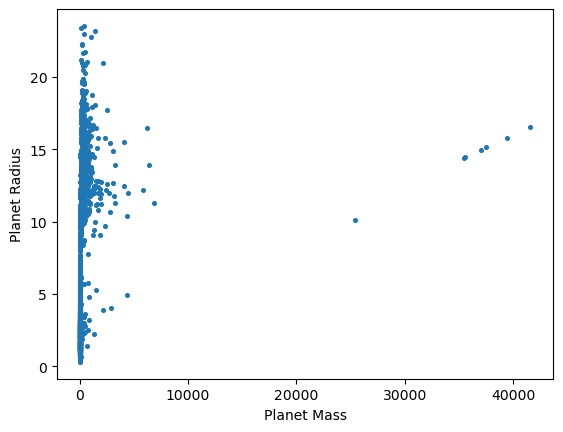</div>

In [ ]:
# plot 'transit_planet_masses' and 'transit_planet_radii'

plot_scatter(..., ..., ..., ...)

**Question 10:** Create the same **scatter plot** as above, but **exclude** planets with `planet_mass` **more than** *250*.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `discovery_method` is **not** *Transit* or have a `planet_mass` greater than *250*.

In [ ]:
# first compute and store the lists 'transit_planet_masses_no_outliers', and 'transit_planet_radii_no_outliers'
# do NOT create the plot just yet


Now, **plot** `transit_planet_masses` and `transit_planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div>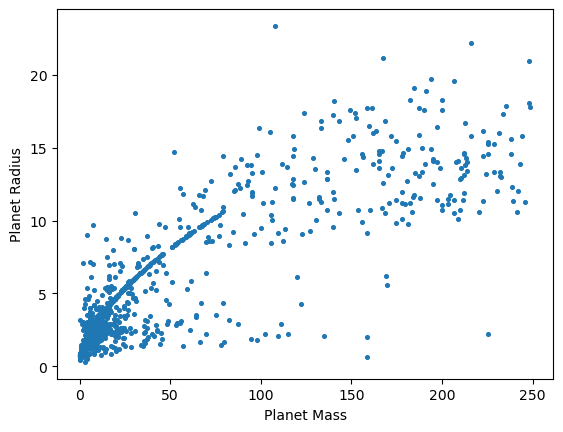</div>

In [ ]:
# plot 'transit_planet_masses' and 'transit_planet_radii'

plot_scatter(..., ..., ..., ...)

### Task 1.3: Changing the color and the size of points with `plot_scatter`

So far, we have not used two of the **optional arguments** of the `plot_scatter` function: `c` and `s`. The parameter `c` can be used to change the **color** to the points on the **scatter plot**, while `s` can be used to change the **sizes** of the points on the **scatter plot**. These arguments can help in visualizing the data better, as in the examples below.

In [ ]:
# run this cell

x = [10, 20, 30, 40]
y = [10, 20, 30, 40]
c = [10, 20, 30, 40]

plot_scatter(x, y, c=c)

#### Understanding the `c` argument:

In the example above, the argument passed to the `c` parameter was a **list** of numbers. The `plot_scatter` function used the values in this **list** to color each point in the plot. For example, the element at index *0* of `x` is *10*, the element at index *0* of `y` is *10*, and the element at index *0* of `c` is *10*. Therefore, the point at the position *(10, 10)* is colored using the number *10*. Similarly, the point at position *(20, 20)* is colored using the number *20*.

A **high** color value means that the color will be **lighter** while a **low** color value means that the color will be **darker**.

#### Understanding the `s` argument:

In comparison to the `c` argument, the `s` argument is relatively simpler to understand. Run the cell below, and try to figure out what happened.

In [ ]:
# run this cell

x = [10, 20, 30, 40]
y = [10, 20, 30, 40]
s = [10, 20, 30, 40]

plot_scatter(x, y, s=s)

**Question 11**: Create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list` whose `discovery_method` is *Radial Velocity*. Additionally, **color** the points on the **scatter plot** depending on the `discovery_year`.

You **must** ignore all `Planet` objects with **missing** `planet_mass`, `planet_radius`, or `discovery_year` data.

In [ ]:
# we have computed the lists 'orbital_period' and 'semi_major_radii' for you

rad_vel_planet_masses = []
rad_vel_planet_radii = []
rad_vel_discovery_years = []
for planet in small_planets_list:
    mass = planet.planet_mass
    radius = planet.planet_radius
    year = planet.discovery_year
    if mass == None or radius == None or year == None:
        continue
    if planet.discovery_method == 'Radial Velocity':
        rad_vel_planet_masses.append(mass)
        rad_vel_planet_radii.append(radius)
        rad_vel_discovery_years.append(year)

In [ ]:
grader.check("q11")

Now, we will **plot** `rad_vel_planet_masses` and `rad_vel_planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*, and **colored** using `rad_vel_discovery_years`.

In [ ]:
# we have done this for you

plot_scatter(rad_vel_planet_masses, rad_vel_planet_radii, 'Planet Mass','Planet Radius', c=rad_vel_discovery_years)

**Food for thought:** What do you think this plot signifies? Recall that a **lighter** color implies a **larger** value in the list `rad_vel_discovery_years`. Where are the lighter colors present in this plot? Can you guess why the colors are spread out the way they are?

**Question 12:** Excluding planets with `orbital_period` **more than** *1000*, create a **scatter plot** representing the `orbital_period` (on the **x-axis**) against the `semi_major_radius` (on the **y-axis**) of each `Planet` object in `small_planets_list`. Additionally, **color** the points on the **scatter plot** depending on the `discovery_year`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period`, `semi_major_radius` or `discovery_year` data is **missing**. You **must** also ignore any `Planet` objects whose `orbital_period` is greater than *1000*. You **must** use the `discovery_year` to **color** the points in the **scatter plot**.

In [ ]:
# first compute and store the lists 'orbital_periods', 'semi_major_radii', and 'discovery_years'
# do NOT create the plot just yet


In [ ]:
grader.check("q12")

Now, **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*, and **colored** using `discovery_years`. Your plot should look like this:

<div>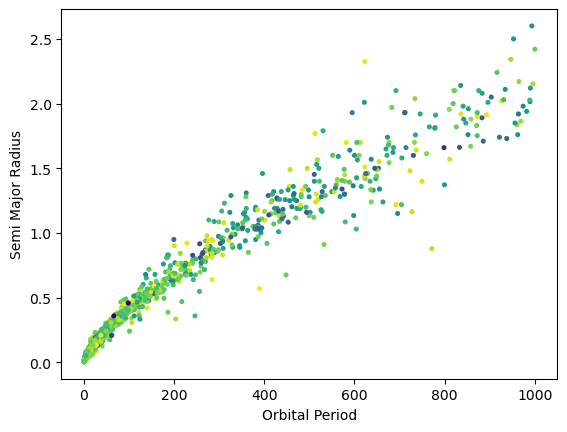</div>

In [ ]:
# plot 'orbital_periods' and 'semi_major_radii' with 'discovery_years' as colors

plot_scatter(..., ..., x_label=..., y_label=..., c=...)

**Question 13:** Create the same plot as above, but additionally change the **size** of the points depending on the `planet_mass`.

You **must** ignore any `Planet` objects for which **either** the `orbital_period`, `semi_major_radius`, `discovery_year` or `planet_mass` data is **missing**. You **must** also ignore any `Planet` objects whose `orbital_period` is greater than *1000*. You **must** use the `discovery_year` to **color** the points in the **scatter plot** and you **must** use the `planet_mass` to change the **size** of the points.

In [ ]:
# first compute and store the lists 'orbital_periods', 'semi_major_radii', 'discovery_years', and 'planet_masses'
# do NOT create the plot just yet


In [ ]:
grader.check("q13")

Now, **plot** `orbital_periods` and `semi_major_radii` as **scatter plot** with the **x-axis** labelled *Orbital Period*, and the **y-axis** labelled *Semi Major Radius*, **colored** using `discovery_years`, and **sized** using `planet_masses`. Your plot should look like this:

<div>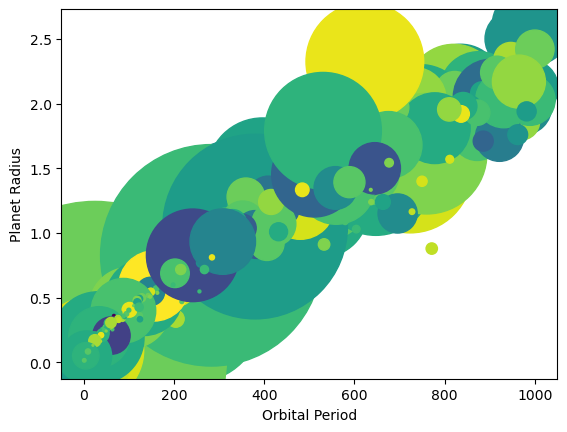</div>

In [ ]:
# plot 'orbital_periods' and 'semi_major_radii' with 'discovery_years' as colors and 'planet_masses' as sizes

plot_scatter(..., ..., x_label=..., y_label=..., c=..., s=...)

### Task 1.4: Plotting multiple scatter plots with `plot_scatter_multiple`

### Function 2: `plot_scatter_multiple(x_data_dict, y_data_dict, x_label, y_label)`

So far, we have used `plot_scatter` to create **scatter plots** using two **lists**, and we have seen how to use the `c` argument to color the **scatter plots** based on another **list** containing *numeric* data. It would be good if we could also **color** the points using *non-numeric* data. For example, we might want to create a **scatter plot** of the `planet_mass` against the `planet_radius`, and **color** the points differently depending on the `discovery_method`. However, since the `discovery_method` is **non-numeric**, the `plot_scatter` function will not be of help (you can try!)

You have been provided with another function `plot_scatter_multiple` which can create **multiple** scatter plots on the same plot.

In [ ]:
def plot_scatter_multiple(x_data_dict, y_data_dict, x_label='x axis', y_label='y axis'):
    legend_values = list(x_data_dict.keys())
    for key in x_data_dict:
        plt.scatter(x_data_dict[key], y_data_dict[key], s=7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_values)

Here is a quick example to see how this function works:

In [ ]:
# run this cell

x_dict = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
y_dict = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
plot_scatter_multiple(x_dict, y_dict)

As you can see, in order to create the **scatter plot**, we had to create **two** dictionaries `x_dict` and `y_dict`. Both **dictionaries** contain the same **keys** (which correspond to the **different colors** on the plot). Corresponding to each **key**, the value in the **dictionary** `x_dict` contains the data in the **x axis** and the value in the **dictionary** `y_dict` contains the data in the **y axis**. For example, the element at index *0* of `x_dict['A']` is *1*, and the element at index *0* of `y_dict['A']` is *1*. Therefore, a point is added to the **scatter plot** at the position *(1, 1)* in the **color** corresponding to the **key** `A`. On the other hand, the element at index *0* of `x_dict['B']` is *5*, and the element at index *0* of `y_dict['B']` is *5*. Therefore, a point is added to the **scatter plot** at the position *(5, 5)* in the **color** corresponding to the **key** `B`.

**Question 14:** Excluding planets with `planet_mass` **more than** *250*, create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object of **each** `discovery_method`.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_method` data is **missing**. You **must** also ignore any `Planet` objects whose `planet_mass` is more than *250*. You **must** color the points depending on the `discovery_method`.

In [ ]:
# we have computed the dictionaries 'planet_masses' and 'planet_radii' for you

planet_masses = {}
planet_radii = {}
for planet in small_planets_list:
    method = planet.discovery_method
    mass = planet.planet_mass
    radius = planet.planet_radius
    if method == None or mass == None or radius == None:
        continue
    if mass > 250:
        continue
    if method not in planet_masses:
        planet_masses[method] = []
        planet_radii[method] = []
    planet_masses[method].append(mass)
    planet_radii[method].append(radius)

In [ ]:
grader.check("q14")

Now, **plot** `planet_masses` and `planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div>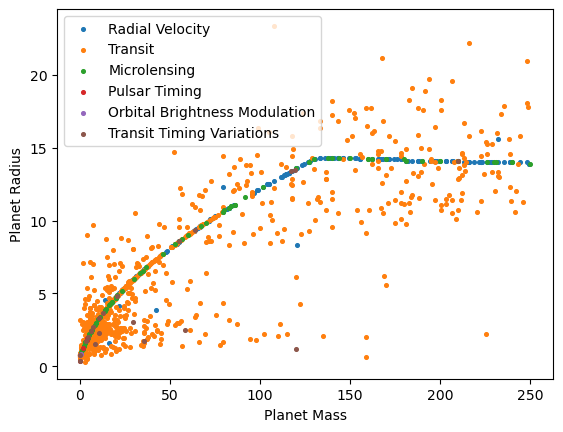</div>

In [ ]:
# we have done this for you

plot_scatter_multiple(planet_masses, planet_radii, 'Planet Mass','Planet Radius')

**Question 15:** Excluding planets with `planet_mass` **more than** *250*, create a **scatter plot** representing the `planet_mass` (on the **x-axis**) against the `planet_radius` (on the **y-axis**) of each `Planet` object discovered in **each decade**.

You **must** ignore any `Planet` objects for which **either** the `planet_mass`, `planet_radius` or `discovery_year` data is **missing**. You **must** also ignore any `Planet` object which has `planet_mass` more than *250*. You **must** color the points depending on the **decade** of the `discovery_year`.

**Hint:** You can use the `year_to_decade` function defined in the next cell to determine the **decade** that a given year belongs to.

In [ ]:
# we have defined this function for you

def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        decade_start = year - (year % 10) + 1
        decade = str(decade_start) + ' to ' + str(decade_start + 9)
    return decade

In [ ]:
# first compute and store the dictionaries 'planet_masses', and 'planet_radii'
# do NOT create the plot just yet


In [ ]:
grader.check("q15")

Now, **plot** `planet_masses` and `planet_radii` as **scatter plot** with the **x-axis** labelled *Planet Mass*, and the **y-axis** labelled *Planet Radius*. Your plot should look like this:

<div>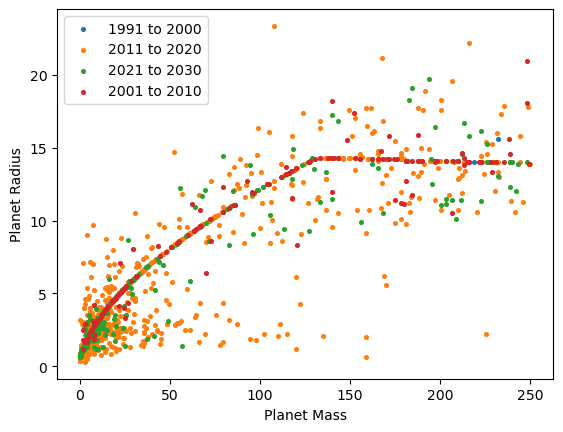</div>

In [ ]:
# plot 'planet_masses' and 'planet_radii'

plot_scatter_multiple(..., ..., x_label = ..., y_label = ...)

## Segment 2: Recursion

In addition to **scatter plots**, you will also have to write some **recursive** functions in P11. You can now practice creating some **recursive** functions here.

### Task 2.1: Flattening a Nested List

A **nested list** is a **list** which contains **lists** as its elements, and these **lists** can themselves contain other **lists** (and so on). **Flattening** a **nested list** involves extracting all the elements in a **nested list**. For example, if a **nested list** is as follows:

```python
[[1, 2], 3, [4, [5, 6], [[7], 8, [9, 10]]]]
```

then the **flattened** version of this list would be:

```python
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
```

### Function 3: `flatten(some_list)`

We are now going to write a **recursive** function to **flatten** a **nested list** and print out all the elements in list.

Let's first consider a **simple case**: when there are no **nested lists** inside the input **list** (i.e., there could be **lists** inside the input **list** but these **lists** have no additional **lists** inside them).

In [ ]:
# we have started this function for you
# you will have to come back to modify this function after a few questions 

def flatten(some_list):
    # initialize an empty list into a variable called 'flattened_list'   
    flattened_list = []
    # iterate over every item inside some_list
    for item in some_list:
        # if item is a list, extend new list by item
        if type(item) == list:
            flattened_list.extend(item)
        # otherwise, append item to the new list
        else:
            flattened_list.append(item)
    return flattened_list

**Question 16:** What is the output of `flatten(['rabbit', ['cat'], ['lion', 'chimpanzee']])`?

In [ ]:
# we have done this one for you

animals = flatten(['rabbit', ['cat'], ['lion', 'chimpanzee']])

animals

In [ ]:
grader.check("q16")

The function `flatten` works when the input is a **list** which does not have any **nested lists** inside it. While this is a good start, we are not finished yet, as this next example shows:

In [ ]:
# run this cell

nested_animals = ["turtle", ["skunk", ["raccoon"], "crocodile"]]

print("flatten does this: ", flatten(nested_animals))
print("flatten should do this: ", ['turtle', 'skunk', 'raccoon', 'crocodile'])

Go back and **update** the function so that it works even if the **lists** in the input `some_list` have additional **nested lists** inside them.

Here is some hints for how your function **must** look:

```python
def flatten(some_list):
    # TODO: initialize an empty list into a variable called 'flattened_list'
    # TODO: iterate over every 'item' inside 'some_list'
        # TODO: check if type of 'item' is list
            # TODO: call 'flatten' function on 'item'
            # TODO: add the elements of the returned list to 'flattened_list'
        # TODO: if item is not a list, just add to 'flattened_list'
    # TODO: return 'flattened_list'
```

**Hint:** Now would be a good time for you to review `append` vs `extend` list methods. Run the following cell to see what these list methods do:

In [ ]:
# run this cell

list1 = [1, 2, 3, 4]
list1.append([4, 5, 6])
print("'append' does this:", list1)

list2 = [1, 2, 3, 4]
list2.extend([4, 5, 6])
print("'extend' does this:", list2)

**Warning:** `flatten` is quite a complicated function, so do **not** try to implement it in one sitting. Practice incremental coding here. First, try to **print** the outcome the recursive call to `flatten(item)` before you figure out how to add it to your list `flattened_list`.

**Question 17:** What is the output of the `flatten` function when run against the below **nested list** `nested_names`?

```python
nested_names = ["Adam", ["Bob", ["Chet"]], "Bea", ["Treasure", "Andy", ["Ann"]]]
```

In [ ]:
# compute and store the answer in the variable 'flattened_names', then display it

nested_names = ["Adam", ["Bob", ["Chet"]], "Bea", ["Treasure", "Andy", ["Ann"]]]


In [ ]:
grader.check("q17")

**Question 18:** What is the output of the `flatten` function when run against the below **nested list** `more_nested_names`?

```python
more_nested_names = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", ["Gold", \
                     ["Andy"]], "Ann"]]
```

In [ ]:
# compute and store the answer in the variable 'more_flattened_names', then display it

more_nested_names = ["Adam", ["Bob", ["Chet", "Cat"], "Barb", "Bert"], "Alex", ["Bea", ["Gold", \
                     ["Andy"]], "Ann"]]


In [ ]:
grader.check("q18")

### Task 2.2: Explore a directory recursively

In Task 2.1, we practiced how to **recursively** collect elements in a **nested list**. In Task 2.2, we are going to **recursively** collect all the **paths** of files in a **given directory**. After collecting them, your function `get_all_paths_in` will return a **sorted list of paths** to files inside this directory. We will practice our function on the `sample_data` directory inside the `sample_data.zip`.

**Question 19:** What are the **files** and **sub-directories** that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **names** of the **files** and **sub-directories**. You **must** ignore all files and sub-directories whose names begin `"."`. You **must** **explicitly** sort the **list** in **descending** (i.e., reverse alphabetical) **order**.

**Hint:** Use `os.listdir` to get the **files** and **sub-directories** in a **directory**.

In [ ]:
# we have done this one for you

directory = "sample_data"
sample_data_contents = sorted([content for content in os.listdir(directory) if not content.startswith(".")], reverse=True)

sample_data_contents

In [ ]:
grader.check("q19")

**Question 20:** How **many** **files** (i.e., **not** **sub-directories**) are in the `sample_data` directory?

Your output **must** be an **int**. You **must** ignore all files whose names begin `"."`.

**Hints:**

1. Use the `os.path.isfile` function to recognize **files** from **directories**.
2. You **must** pass the **relative path** of the **file** to determine if it is a file. For example, if you want to determine if the file `file_1.json` inside the directory `sample_data` is a **file**, you must use

```python
os.path.isfile(os.path.join("sample_data", "file_1.json"))
```

In [ ]:
# compute and store the answer in the variable 'num_sample_data_files', then display it

directory = "sample_data"
# TODO: find the number of files in 'directory'

In [ ]:
grader.check("q20")

**Question 21:** What are the **relative paths** of the **sub-directories** (i.e., **not files**) that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **relative paths** of the **sub-directories**. You **must** ignore all sub-directories whose names begin `"."`. You **must** **explicitly** sort the **list** in **descending** (i.e., reverse alphabetical) **order**.

**Hint:** Use the `os.path.isdir` function to recognize **files** from **directories**.

**Warning:** Use `os.path.join` to get the **relative paths** of the **sub-directories**. Remember you **must not** hardcode `'\\'` or `'/'` in your paths.

In [ ]:
# compute and store the answer in the variable 'sample_data_directories', then display it

directory = "sample_data"
# TODO: list the sub-directories in 'directory'

In [ ]:
grader.check("q21")

We are now ready to define our recursive function.

### Function 4:  `get_all_paths_in(directory)`

You **must** write this function that takes in the **relative path** of a `directory` as its input, and returns a **list** of **relative paths** of all the **files** inside `directory` and its subdirectories.

You **must** **ignore** all files that start with `"."`, and your output **must** be **explicitly** sorted in **reverse alphabetical** order.

In other words, if a directory `small_data` looks like this:
```
+-- sample_data
|   +-- .DS_Store
|   +-- file_1.json
|   +-- sample_1
|   |   +-- .ipynb_checkpoints
|   |   +-- file_2.json
|   |   +-- file_3.json
|   +-- sample_2
|   |   +-- file_4.json
|   |   +-- sample_3
|   |   |   +-- .DS_Store
|   |   |   +-- file_5.json
```

then the output of the function call `get_all_paths_in("sample_data")` (depending on whether the code is run on a Windows computer or a Mac) **must** either be the **list**
```python
['sample_data\\sample_2\\sample_3\\file_5.json',
 'sample_data\\sample_2\\file_4.json',
 'sample_data\\sample_1\\file_3.json',
 'sample_data\\sample_1\\file_2.json',
 'sample_data\\file_1.json']
```

or the **list**
```python
['sample_data/sample_2/sample_3/file_5.json',
 'sample_data/sample_2/file_4.json',
 'sample_data/sample_1/file_3.json',
 'sample_data/sample_1/file_2.json',
 'sample_data/file_1.json']
```

In [ ]:
# define the 'get_all_paths_in' function here

def get_all_paths_in(directory):
    pass # replace with your code
    # TODO: initialize an empty list
    # TODO: loop through all files and directories in 'directory' that do not start with "."
        # TODO: check if it is a directory
            # TODO: call 'get_all_paths_in' and add returned paths to your list
        # TODO: if it is a file, directly add to your list
    # TODO: sort the list of paths and then return the list

**Question 22:** How **many** files are there in total, in the `sample_2` directory of the `sample_data` directory?

You **must** use the `get_all_paths_in` function to answer this question.

In [ ]:
# we have done this one for you

num_files_sample_2 = len(get_all_paths_in(os.path.join("sample_data", "sample_2")))

num_files_sample_2

In [ ]:
grader.check("q22")

**Question 23:** What are the **relative paths** of all the **files** that are inside the `sample_data` directory?

Your output **must** be a **list** containing the **relative paths** of **files**. You **must** use the `get_all_paths_in` function to answer this question.

In [ ]:
# compute and store the answer in the variable 'sample_data_all_files', then display it


In [ ]:
grader.check("q23")

## Great work! You are now ready to start P11!